In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CS/phishing_site_urls.csv')

#displaying the first 5 rows
data.head(5)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
data.shape

(549346, 2)

In [ ]:
#Displaying a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
#Displaying a stastical summary of the dataset
data.describe()

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [ ]:
#Counting and checking for null values
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(data.Label.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


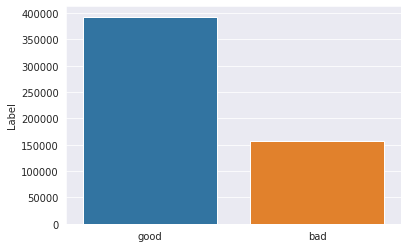

In [ ]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

In [ ]:
data.Label.value_counts()

good    392924
bad     156422
Name: Label, dtype: int64

In [ ]:
#data.replace({'good':0, 'bad':1}, inplace=True)

In [ ]:
#data.Label.value_counts()

In [ ]:
%matplotlib inline
import seaborn as sns  
import time 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer  
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle 

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
tokenizer.tokenize(data.URL[0]) # this will fetch all the words from the first URL

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:
# Tokenizing all the rows 
print('Getting words tokenized ...')
t0= time.perf_counter()
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.341708295999979 sec


In [ ]:
data.sample(5)

,URL,Label,text_tokenized
451603,tripadvisor.com/ShowUserReviews-g35805-d597674...,good,"[tripadvisor, com, ShowUserReviews, g, d, r, H..."
40224,www.pls-print.com/images/index.htm?us.battle.n...,bad,"[www, pls, print, com, images, index, htm, us,..."
304981,city-data.com/city/Los-Angeles-California.html,good,"[city, data, com, city, Los, Angeles, Californ..."
93385,www.frontiernet.net/~carlise/riddle/index.html,good,"[www, frontiernet, net, carlise, riddle, index..."
2011,www.allegro.xaa.pl/login.php,bad,"[www, allegro, xaa, pl, login, php]"


In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 50.209386107 sec


In [ ]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed
445080,thefunkstore.com/BernieWorrellRoom.htm,good,"[thefunkstore, com, BernieWorrellRoom, htm]","[thefunkstor, com, bernieworrellroom, htm]"
104542,miselaistanbul.com/imagesEx/,bad,"[miselaistanbul, com, imagesEx]","[miselaistanbul, com, imagesex]"
507407,iwebsdns.com/67j5hg,bad,"[iwebsdns, com, j, hg]","[iwebsdn, com, j, hg]"
3856,steamgames.a.nf/,bad,"[steamgames, a, nf]","[steamgam, a, nf]"
534587,rentvspb.ru/gtipssu,bad,"[rentvspb, ru, gtipssu]","[rentvspb, ru, gtipssu]"


In [ ]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.3051243379999278 sec


In [ ]:
bad_sites = data[data.Label == 'bad']
good_sites = data[data.Label == 'good']

In [ ]:
#bad_sites.head()

In [ ]:
#good_sites.head()

In [ ]:
data.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
#feature[:5].toarray() # convert sparse matrix into array to print transformed features

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, data.Label, test_size=0.3, random_state=5)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
lr.score(trainX,trainY)

0.977263861944859

In [ ]:
lr.score(testX,testY)

0.9632897259775248

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.977
Testing Accuracy : 0.963

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.90      0.96      0.93     43880
        Good       0.99      0.96      0.97    120924

    accuracy                           0.96    164804
   macro avg       0.95      0.96      0.95    164804
weighted avg       0.96      0.96      0.96    164804


CONFUSION MATRIX


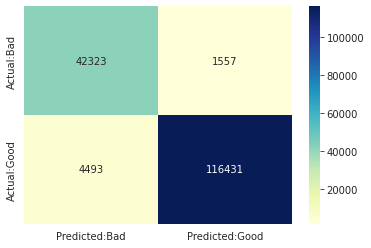

In [ ]:
# creating confusing matrix
print('Training Accuracy : {:.3f}'.format(lr.score(trainX,trainY)))
print('Testing Accuracy : {:.3f}'.format(lr.score(testX,testY)))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

KNN - K-Nearest Neighbor

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=2)
#knn.fit(trainX,trainY)

In [ ]:
#knn.score(testX,testY)

In [ ]:
#ypred = knn.predict(testX)

In [ ]:
# #creating confusing matrix
#print('Training Accuracy :',knn.score(trainX,trainY))
# print('Testing Accuracy :',knn.score(testX,testY))
# con_mat = pd.DataFrame(confusion_matrix(knn.predict(testX), testY),
#             columns = ['Predicted:Bad', 'Predicted:Good'],
#             index = ['Actual:Bad', 'Actual:Good'])


# print('\nCLASSIFICATION REPORT\n')
# print(classification_report(knn.predict(testX), testY,
#                             target_names =['Bad','Good']))

# print('\nCONFUSION MATRIX')
# plt.figure(figsize= (6,4))
# sns.heatmap(con_mat, annot = True,fmt='g', cmap="Blues", annot_kws = {'size': 14})

Decision Tree

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(trainX, trainY)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(testX)
y_train_tree = tree.predict(trainX)

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(trainY,y_train_tree)
acc_test_tree = accuracy_score(testY,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.797
Decision Tree: Accuracy on test Data: 0.798



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.39      0.79      0.52     23062
        Good       0.96      0.80      0.87    141742

    accuracy                           0.80    164804
   macro avg       0.67      0.80      0.70    164804
weighted avg       0.88      0.80      0.82    164804


CONFUSION MATRIX


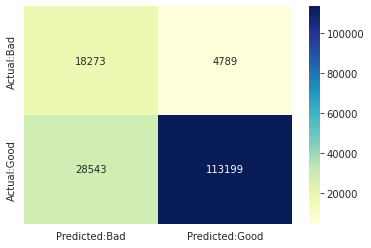

In [ ]:
con_mat = pd.DataFrame(confusion_matrix(y_test_tree, testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test_tree, testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Random Forest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(trainX, trainY) 

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(testX)
y_train_forest = forest.predict(trainX)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(trainY,y_train_forest)
acc_test_forest = accuracy_score(testY,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.715
Random forest: Accuracy on test Data: 0.716


In [ ]:
from tabulate import tabulate

In [ ]:
data = [["Logistic Regressiom", lr.score(trainX,trainY), lr.score(testX,testY)], 
        ["Decision Tree", acc_train_tree, acc_test_tree],
        ["Random Forest", acc_train_forest, acc_test_forest]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ Logistic Regressiom │      0.977264 │     0.96329  │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.796893 │     0.797748 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.71497  │     0.715929 │
╘═════════════════════╧═══════════════╧══════════════╛
